In [2]:
import math
import datetime
import pandas as pd
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [3]:
# get stock
# df = web.DataReader('AAPL', data_source='yahoo', start="2012-01-01", end="2019-12-17")
# df

In [6]:
def parser(t):
     return datetime.datetime.strptime(t, "%Y-%m-%d")
df= pd.read_csv('../data/BTC-USD.csv', header=0, parse_dates=[0], date_parser=parser)   
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2423,2021-05-06,57441.308594,58363.316406,55382.507813,56396.515625,56396.515625,6.952329e+10
2424,2021-05-07,56413.953125,58606.632813,55321.847656,57356.402344,57356.402344,6.843402e+10
2425,2021-05-08,57352.765625,59464.613281,56975.210938,58803.777344,58803.777344,6.538298e+10
2426,2021-05-09,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(2428, 7)

In [49]:
data

,Close
0,457.334015
1,424.440002
2,394.795990
3,408.903992
4,398.821014
...,...
2423,56396.515625
2424,57356.402344
2425,58803.777344
2426,NaN


In [50]:
# plt.figure(figsize=(16,8))
# plt.title(" Close Price history ")
# plt.plot(df['Close'])
# plt.xlabel("Date",fontsize=18)
# plt.ylabel("Close Price USD($)",fontsize=18)
# plt.show()

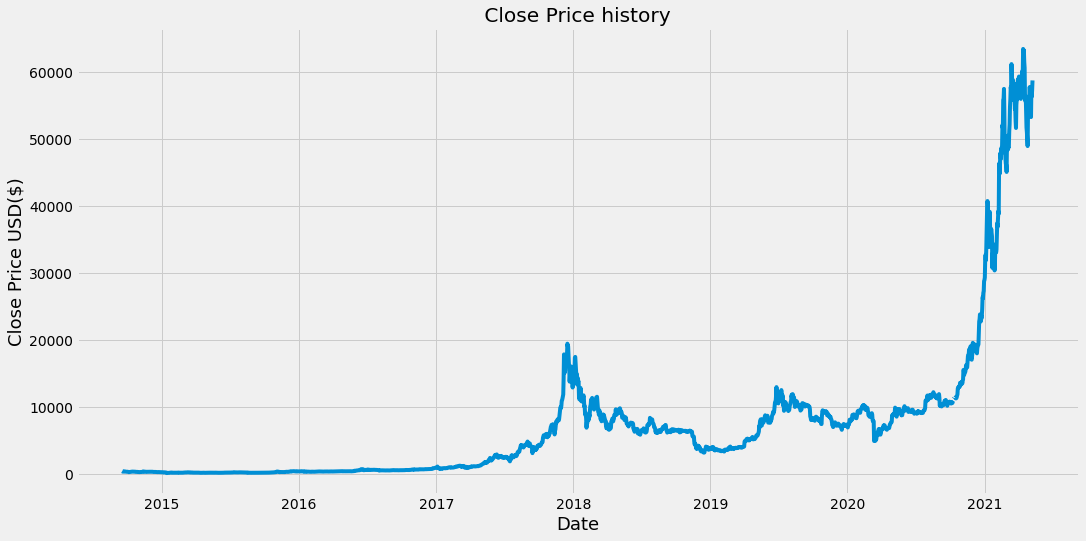

In [52]:
plt.figure(figsize=(16,8))
plt.title(" Close Price history ")
plt.plot(df['Date'],df['Close'])
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price USD($)",fontsize=18)
plt.show()

In [53]:
data = df.filter(['Close'])
dataset=data.values
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1943

In [54]:
dataset.shape

(2428, 1)

In [55]:
#scalling data
scaler= MinMaxScaler(feature_range=(0,1))
scaler.fit(dataset)
scaler_data = scaler.transform(dataset)

In [56]:
scaler_data

array([[0.00440947],
       [0.00389002],
       [0.0034219 ],
       ...,
       [0.92578518],
       [       nan],
       [0.92511583]])

In [57]:
train_data = scaler_data[0:training_data_len,:]
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00440947, 0.00389002, 0.0034219 , 0.00364469, 0.00348546,
       0.00353806, 0.00406927, 0.00387052, 0.00368685, 0.00357396,
       0.0034965 , 0.00314373, 0.00311667, 0.00329791, 0.00324534,
       0.00311043, 0.00286471, 0.00238077, 0.00224882, 0.00239992,
       0.00249638, 0.00276093, 0.00295179, 0.00289709, 0.00290872,
       0.00316534, 0.0033527 , 0.00351782, 0.00342154, 0.00322861,
       0.00324759, 0.00336893, 0.00333899, 0.00323318, 0.0032905 ,
       0.00323812, 0.00284742, 0.00284628, 0.00267141, 0.00278879,
       0.00276171, 0.0028348 , 0.00248697, 0.00264036, 0.00253008,
       0.00233155, 0.0023338 , 0.00236005, 0.00240645, 0.00254847,
       0.00270329, 0.00259473, 0.00264325, 0.00292396, 0.00298176,
       0.00299394, 0.00387614, 0.00383151, 0.00346962, 0.00312718])]
[0.003312717239407263]

[array([0.00440947, 0.00389002, 0.0034219 , 0.00364469, 0.00348546,
       0.00353806, 0.00406927, 0.00387052, 0.00368685, 0.00357396,
       0.0034965 , 0.00314373, 0.0

In [58]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [59]:
# reshape
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1883, 60, 1)

In [60]:
# build lstm model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [61]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [62]:
model.fit(x_train,y_train,batch_size=1,epochs=5)

Epoch 1/5
1883/1883 [==============================] - 42s 21ms/step - loss: 3.3508e-04
Epoch 2/5
1883/1883 [==============================] - 37s 20ms/step - loss: 1.2912e-04
Epoch 3/5
1883/1883 [==============================] - 39s 21ms/step - loss: 8.7474e-05
Epoch 4/5
1883/1883 [==============================] - 39s 21ms/step - loss: 6.9442e-05
Epoch 5/5
1883/1883 [==============================] - 47s 25ms/step - loss: 5.4735e-05


In [64]:
# test 
test_data = scaler_data[training_data_len-60:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [65]:
x_test = np.array(x_test)

In [66]:
# reshape
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [67]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [68]:
predictions.shape

(485, 1)

In [69]:
# loss
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

nan

In [63]:
# # plot 
# train = data[:training_data_len]
# valid = data[training_data_len:]
# valid['predictions'] =  predictions
# # visual
# plt.figure(figsize=(16,8))
# plt.title(" Model Close Price Predictions")
# plt.xlabel("Date",fontsize=18)
# plt.ylabel("Close Price USD($)",fontsize=18)
# plt.plot(train['Close'])
# plt.plot(valid[['Close','predictions']])
# plt.legend(['Train','Val','predictions'])
# plt.show()

In [71]:
# 2014-09-17 
datelist = pd.date_range('2014-09-17', periods=2428)
datelist

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2021-05-01', '2021-05-02', '2021-05-03', '2021-05-04',
               '2021-05-05', '2021-05-06', '2021-05-07', '2021-05-08',
               '2021-05-09', '2021-05-10'],
              dtype='datetime64[ns]', length=2428, freq='D')

             Close       Date
0       457.334015 2014-09-17
1       424.440002 2014-09-18
2       394.795990 2014-09-19
3       408.903992 2014-09-20
4       398.821014 2014-09-21
...            ...        ...
2423  56396.515625 2021-05-06
2424  57356.402344 2021-05-07
2425  58803.777344 2021-05-08
2426           NaN 2021-05-09
2427  58761.390625 2021-05-10

[2428 rows x 2 columns]
            Close       Date
0      457.334015 2014-09-17
1      424.440002 2014-09-18
2      394.795990 2014-09-19
3      408.903992 2014-09-20
4      398.821014 2014-09-21
...           ...        ...
1938  8163.692383 2020-01-07
1939  8079.862793 2020-01-08
1940  7879.071289 2020-01-09
1941  8166.554199 2020-01-10
1942  8037.537598 2020-01-11

[1943 rows x 2 columns]
             Close       Date
1943   8192.494141 2020-01-12
1944   8144.194336 2020-01-13
1945   8827.764648 2020-01-14
1946   8807.010742 2020-01-15
1947   8723.786133 2020-01-16
...            ...        ...
2423  56396.515625 2021-05-06
24

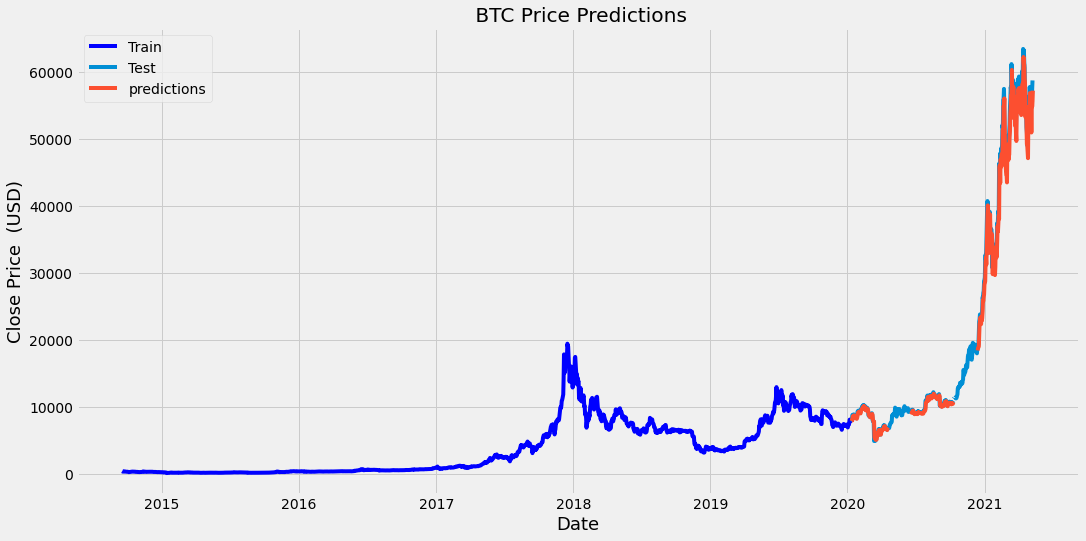

In [93]:
# warnings
import warnings
warnings.filterwarnings("ignore")
# plot 
data['Date']=datelist
print(data)
train = data[:training_data_len]
print(train)
valid = data[training_data_len:]
print(valid)
valid['predictions'] =  predictions
# visual
plt.figure(figsize=(16,8))
plt.title(" BTC Price Predictions")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price  (USD)",fontsize=18)
plt.plot(train['Date'],train['Close'],c='b')
plt.plot(valid['Date'],valid[['Close','predictions']])
plt.legend(['Train','Test','predictions'])
plt.show()

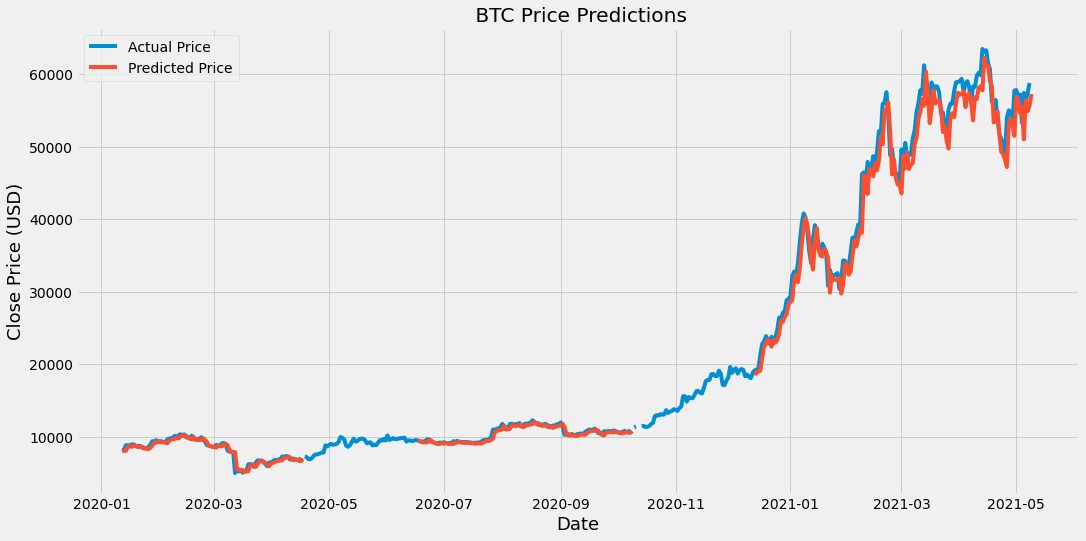

In [96]:
# visual
plt.figure(figsize=(16,8))
plt.title(" BTC Price Predictions")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price (USD)",fontsize=18)
plt.plot(valid['Date'],valid[['Close','predictions']])
plt.legend(['Actual Price','Predicted Price'])
plt.show()